<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/exames.csv"
dados = pd.read_csv(url)

In [9]:
dados.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [10]:
dados.shape

(569, 35)

In [ ]:
dados

In [12]:
y = dados['diagnostico']


In [14]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostico, Length: 569, dtype: object

In [15]:
#verificando se há nulos nas colunas
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [16]:
X = dados[['exame_1',	'exame_2',	'exame_3',	'exame_4',	'exame_5',	'exame_6',	'exame_7',	'exame_8',	'exame_9',	'exame_10',	'exame_11', 'exame_12',	'exame_13',	'exame_14',	'exame_15',	'exame_16',	'exame_17',	'exame_18',	'exame_19',	'exame_20',	'exame_21',	'exame_22',	'exame_23',	'exame_24',	'exame_25',	'exame_26',	'exame_27',	'exame_28',	'exame_29',	'exame_30',	'exame_31',	'exame_32']]

In [ ]:
#dados_temp = dados.iloc[:,2:30]
#X = dados_temp.drop(['id'],0)


In [ ]:
X


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
# O SelectKBest pode ser usado com várias funções, aqui usamos a f_classif (dados numéricos e variável alvo categórica)

f_classifteste = SelectKBest(score_func=f_classif,k=10)

In [19]:
modelofeat = f_classifteste.fit(X,y)

In [20]:
features = modelofeat.transform(X)

In [21]:
print(features)

[[1.799e+01 1.228e+02 1.001e+03 ... 2.019e+03 7.119e-01 2.654e-01]
 [2.057e+01 1.329e+02 1.326e+03 ... 1.956e+03 2.416e-01 1.860e-01]
 [1.969e+01 1.300e+02 1.203e+03 ... 1.709e+03 4.504e-01 2.430e-01]
 ...
 [1.660e+01 1.083e+02 8.581e+02 ... 1.124e+03 3.403e-01 1.418e-01]
 [2.060e+01 1.401e+02 1.265e+03 ... 1.821e+03 9.387e-01 2.650e-01]
 [7.760e+00 4.792e+01 1.810e+02 ... 2.686e+02 0.000e+00 0.000e+00]]


In [ ]:
# identificando os nomes das features escolhidas
cols = modelofeat.get_support(indices=True)
X.iloc[:,cols]

In [23]:
# usando o qui-quadrado para testar... qui quadrado é melhor quando as variáveis são categóricas e a alvo também

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [24]:
testechi = SelectKBest(chi2,k=10)
testechifeat = testechi.fit(X,y)

In [25]:
# mostrando o índice das melhores features apontadas pelo qui quadrado
testechifeat.get_support(indices=True)

array([ 0,  1,  2,  4, 13, 14, 21, 22, 23, 24])

In [26]:
features1 = testechifeat.transform(X)

In [27]:
print(features1)

[[  17.99   10.38  122.8  ...   17.33  184.6  2019.  ]
 [  20.57   17.77  132.9  ...   23.41  158.8  1956.  ]
 [  19.69   21.25  130.   ...   25.53  152.5  1709.  ]
 ...
 [  16.6    28.08  108.3  ...   34.12  126.7  1124.  ]
 [  20.6    29.33  140.1  ...   39.42  184.6  1821.  ]
 [   7.76   24.54   47.92 ...   30.37   59.16  268.6 ]]


In [ ]:
# identificando os nomes das features escolhidas
cols = testechifeat.get_support(indices=True)
X.iloc[:,cols]

In [ ]:
# Recursive Filter Elimination (RFE) - método wrapper

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [30]:
modelo1 = LogisticRegression(max_iter=2000)

In [31]:
rfe = RFE(modelo1,n_features_to_select=10)

In [32]:
fitrfe = rfe.fit(X,y)

In [33]:
print("Número de features: {}".format(fitrfe.n_features_))

Número de features: 10


In [ ]:
cols = fitrfe.get_support(indices=True)
X.iloc[:,cols]

In [ ]:
# Feature Importance

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [36]:
modelo2 = ExtraTreesClassifier()

In [37]:
modelo2.fit(X,y)

ExtraTreesClassifier()

In [38]:
print(modelo2.feature_importances_)

[0.06058634 0.01715932 0.05543791 0.         0.04621907 0.00814852
 0.02398685 0.0457429  0.10179454 0.0079714  0.00663232 0.01809202
 0.00570725 0.02212019 0.03673833 0.00560215 0.0062447  0.01036419
 0.00887077 0.00540784 0.00546741 0.07535242 0.02728139 0.10589137
 0.08284901 0.02093062 0.03049347 0.04568524 0.         0.08706488
 0.01687986 0.00927773]


In [ ]:
feat_importances = pd.Series(modelo2.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
# Usando Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [42]:
modelo3 = RandomForestClassifier(n_estimators=20)

In [43]:
modelo3.fit(X,y)

RandomForestClassifier(n_estimators=20)

In [44]:
print(modelo3.feature_importances_)

[0.09202991 0.006947   0.00722335 0.         0.07822618 0.00769517
 0.00450591 0.10274643 0.09115197 0.00146112 0.00301662 0.0078912
 0.0067245  0.00560811 0.01257377 0.0029177  0.00247166 0.00651527
 0.0049605  0.00326852 0.0057001  0.1678071  0.02808076 0.0836198
 0.12855472 0.00913707 0.03194402 0.04274443 0.         0.0337787
 0.01169361 0.00900478]


In [45]:
feat_importances = pd.DataFrame(modelo3.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending = False)


In [ ]:
feat_importances

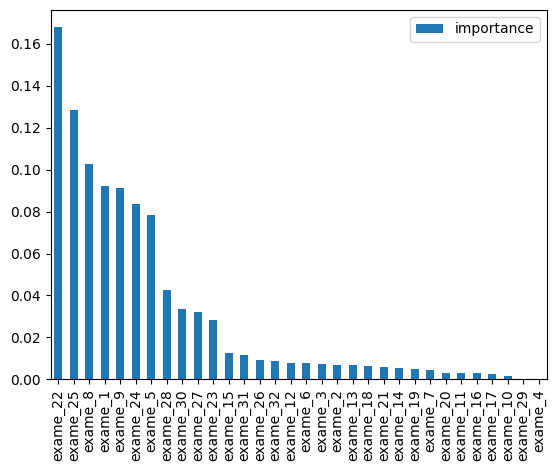

In [47]:
feat_importances.plot(kind='bar')
plt.show()